# **Caesar Cipher**

Caesar Cipher is a type of substitution cipher in which each letter in the plaintext is replaced by a letter some fixed number of positions down the alphabet. For example, with a left shift of 3, *D* would be replaced by *A*, *E* would become *B*, and so on.

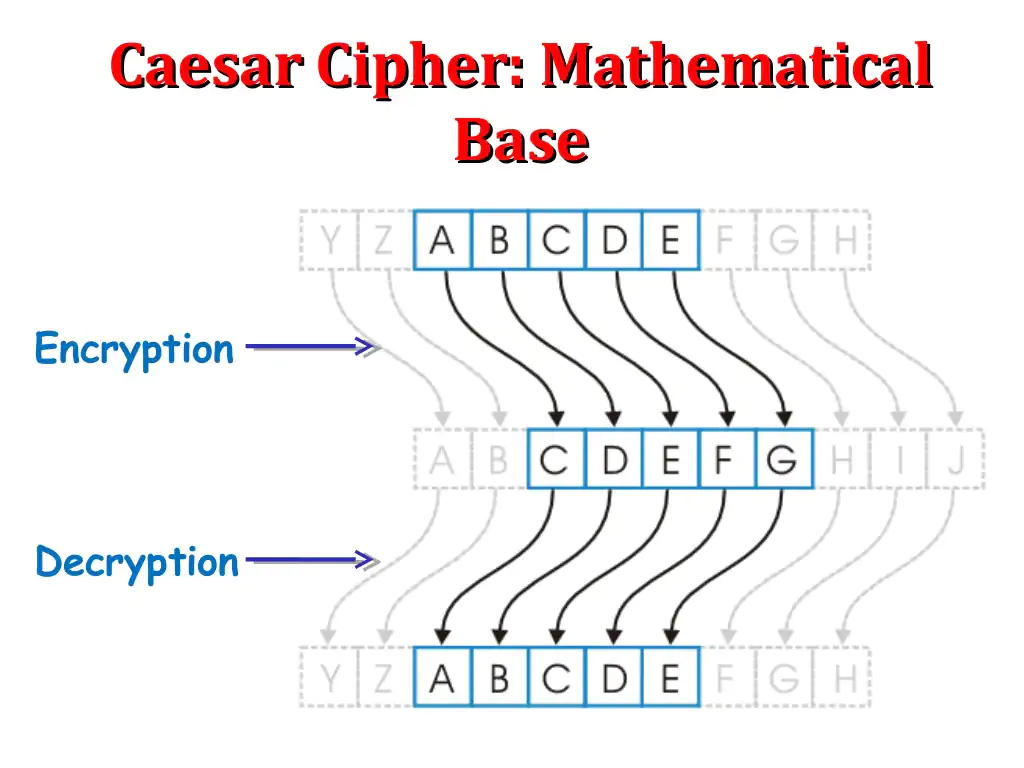

Write a function that given a text string and a shift value, encrypts the text using the caesar cipher.

To prove it is correct, the string "**CEASER CIPHER DEMO**" with right shift value **4**, should encrypt to "**GIEWIV GMTLIV HIQS**".

In [ ]:
#https://www.tutorialspoint.com/cryptography_with_python/cryptography_with_python_caesar_cipher.htm

def encrypt(text,s):
   result = ""
   # transverse the plain text
   for i in range(len(text)):
      char = text[i]
      # Encrypt uppercase characters in plain text
      
      if (char.isupper()):
         result += chr((ord(char)-65 + s) % 26 + 65) #A is 65 in ASCII
      else:
         result += " "
   return result
#check the above function
text = "CEASER CIPHER DEMO"
s = 4

print("Plain Text : " + text)
print("Shift pattern : " + str(s))
print("Cipher: " + encrypt(text,s))

Plain Text : CEASER CIPHER DEMO
Shift pattern : 4
Cipher: GIEWIV GMTLIV HIQS


Imagine you have the previous encrypted string but you don't know the shift value. What would be a good strategy to obtain the plaintext?

Find a way to do it and write the code.

**Hint**: try bruteforcing through all possible shift values.

In [ ]:
#https://www.tutorialspoint.com/cryptography_with_python/cryptography_with_python_caesar_cipher.htm

message = 'GIEWIV GMTLIV HIQS' #encrypted message
LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

for key in range(len(LETTERS)):
   translated = ''
   for symbol in message:
      if symbol in LETTERS:
         num = LETTERS.find(symbol)
         num = num - key
         if num < 0:
            num = num + len(LETTERS)
         translated = translated + LETTERS[num]
      else:
         translated = translated + symbol
   print('Hacking key #%s: %s' % (key, translated))

Hacking key #0: GIEWIV GMTLIV HIQS
Hacking key #1: FHDVHU FLSKHU GHPR
Hacking key #2: EGCUGT EKRJGT FGOQ
Hacking key #3: DFBTFS DJQIFS EFNP
Hacking key #4: CEASER CIPHER DEMO
Hacking key #5: BDZRDQ BHOGDQ CDLN
Hacking key #6: ACYQCP AGNFCP BCKM
Hacking key #7: ZBXPBO ZFMEBO ABJL
Hacking key #8: YAWOAN YELDAN ZAIK
Hacking key #9: XZVNZM XDKCZM YZHJ
Hacking key #10: WYUMYL WCJBYL XYGI
Hacking key #11: VXTLXK VBIAXK WXFH
Hacking key #12: UWSKWJ UAHZWJ VWEG
Hacking key #13: TVRJVI TZGYVI UVDF
Hacking key #14: SUQIUH SYFXUH TUCE
Hacking key #15: RTPHTG RXEWTG STBD
Hacking key #16: QSOGSF QWDVSF RSAC
Hacking key #17: PRNFRE PVCURE QRZB
Hacking key #18: OQMEQD OUBTQD PQYA
Hacking key #19: NPLDPC NTASPC OPXZ
Hacking key #20: MOKCOB MSZROB NOWY
Hacking key #21: LNJBNA LRYQNA MNVX
Hacking key #22: KMIAMZ KQXPMZ LMUW
Hacking key #23: JLHZLY JPWOLY KLTV
Hacking key #24: IKGYKX IOVNKX JKSU
Hacking key #25: HJFXJW HNUMJW IJRT


# **XOR Cipher**

Given that I have the next plaintext string, "**XOR ENCRYPT**", and a key string, "**A SHORT KEY**", use a XOR cipher to encrypt the plaintext.

The result should be given as a series of hex values.

Result: 196f01680a1c177212150d

**Hint**: use the ASCII values of characters

In [ ]:
#https://cryptik.io/72/cryptopals-write-up-set-1-challenge-2/
# --------------------------------------------------------
# ------------------- Problem Solution -------------------
# --------------------------------------------------------
plaintext = "XOR ENCRYPT"
key = "A SHORT KEY"

def string_to_ascii(x):
    ascii = []
    for i in x:
        ascii.append(ord(i))
    return ascii

# XOR'ing x and y using the python XOR operator

plaintext_ascii = string_to_ascii(plaintext)
key_ascii = string_to_ascii(key)

result = []

for i in range(len(plaintext_ascii)):
    result.append(plaintext_ascii[i]^key_ascii[i])

hex_result = bytearray(result)
print(hex_result.hex())


196f01680a1c177212150d


# **Single-byte XOR cipher** (Taken from cryptopals crypto challenges)



The hex encoded string:

*1b37373331363f78151b7f2b783431333d78397828372d363c78373e783a393b3736*

... has been XOR'd against a single character. Find the key, decrypt the message.

You can do this by hand. But don't: write code to do it for you.

How? Devise some method for "scoring" a piece of English plaintext. Character frequency is a good metric. Evaluate each output and choose the one with the best score. 

In [ ]:
from string import ascii_letters

def string_xor_value(input_bytes, val):
    xor = bytearray([])
    for i in input_bytes:
        xor.append(i ^ val)
    return xor


#https://cryptik.io/83/cryptopals-write-up-set-1-challenge-3/
# --------------------------------------------------------
# ---------------------- functions -----------------------
# --------------------------------------------------------
def get_score(message):
    '''
    a function that takes input string and using letter 
    frequency it scores it. The closest the score is 
    to 1.00, the more realistic.
    '''
    score = 0
    freq = {'a': 0.0812, 'b': 0.0149, 'c': 0.0271, 'd': 0.0432,
    'e': 0.1202, 'f': 0.0230, 'g': 0.0202, 'h': 0.0592, 'i': 0.0731,
    'j': 0.001, 'k': 0.0069, 'l': 0.0398, 'm': 0.0261, 'n': 0.0695,
    'o': 0.0768, 'p': 0.0182, 'q': 0.0011, 'r': 0.0602, 's': 0.0628,
    't': 0.091, 'u': 0.0288, 'v': 0.0111, 'w': 0.0209, 'x': 0.0017,
    'y': 0.0211, 'z': 0.0007, ' ': .1}
    for c in message:
        score += freq.get(c, 0) #if it is not an alphabet, give it a score of 0
    return score/len(message)


x = '1b37373331363f78151b7f2b783431333d78397828372d363c78373e783a393b3736'
x = bytes.fromhex(x)
highestscore = 0
# XOR'ing x and y using the python XOR operator
for c in ascii_letters:
    #convert the character to an integer to use it in the strxor_c function
    result = string_xor_value(x,ord(c))
    #decode 'UTF-8' from bytes to string of text
    result = result.decode()
    score = get_score(result)
    if (score > highestscore):
        highestscore = score
        output = 'Character:'+c+" -|- XOR'd output: "+result+' -|- score = '+str(score)
print(output)

Character:X -|- XOR'd output: Cooking MC's like a pound of bacon -|- score = 0.05626764705882352
